# _Iris Flower Species Classification Problem_



In [42]:
#os specifics and versions
import os
import sys
assert sys.version_info >= (3,5)
#arrays and dataframes operations 
import numpy as np
import pandas as pd
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline 
#consistent plot sizes
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#To accommodate maximum number of colums in Jupyter
pd.options.display.max_columns = False
#statistical package
import statistics
#modeling
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## _Load Iris Data & Basic Exploration_

In [4]:
from sklearn.datasets import load_iris
dataset =  load_iris()

In [5]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
#create a datafram
iris = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [10]:
iris['species'] = dataset.target
iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


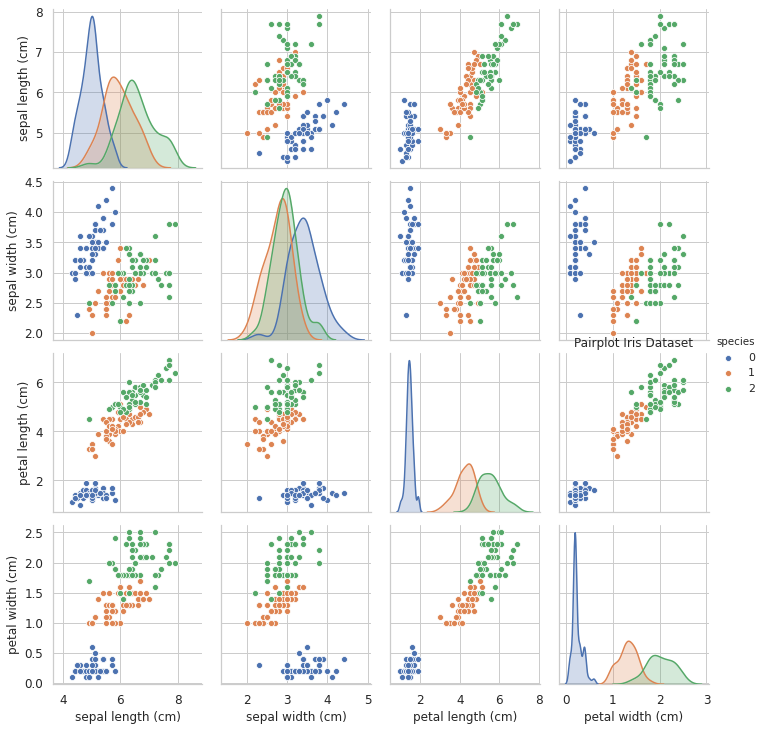

In [12]:
#check the pair plot
sns.pairplot(iris,diag_kind='kde',hue='species')
plt.title('Pairplot Iris Dataset')
plt.show()

In [14]:
#check correlations
iris.corr()['species']

sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
species              1.000000
Name: species, dtype: float64

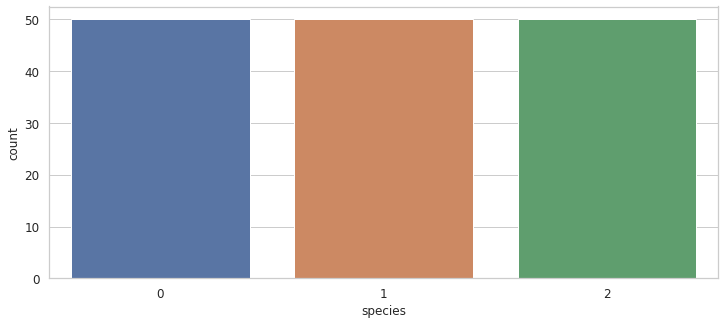

In [18]:
sns.countplot(iris['species'])
plt.show()

_The dataset is balanced_

## _Modeling_

In [35]:
#split into the train and test set
X = iris.drop('species',axis=1)
y = iris['species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)

In [36]:
#logistic regression
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)
log_clf_pred = log_clf.predict(X_test)

In [39]:
#random forest regressor
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train,y_train)
rf_clf_pred =  rf_clf.predict(X_test)

In [40]:
predictions = {'Logistic Regression':log_clf_pred,'Random Forest':rf_clf_pred}

In [41]:
for key,value in predictions.items():
    acc = accuracy_score(y_test,value)
    r2 = r2_score(y_test,value)
    print('%s Accuracy:%.2f and R2 Score:%.2f'%(key,acc,r2))

Logistic Regression Accuracy:0.98 and R2 Score:0.97
Random Forest Accuracy:0.96 and R2 Score:0.94


In [45]:
print('Logistic Regression Classification Report')
print(classification_report(y_test,log_clf_pred))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.95      0.97        19
           2       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [46]:
print('Random Forest Classifier Classification Report')
print(classification_report(y_test,rf_clf_pred))

Random Forest Classifier Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        14

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



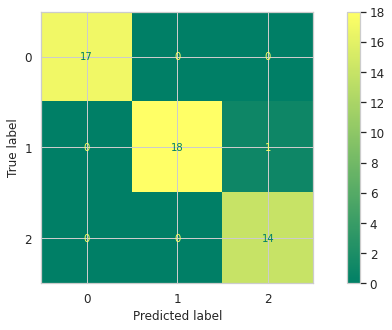

In [52]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_clf,X_test,y_test,cmap='summer')
plt.show()